<a href="https://www.kaggle.com/code/haddonalexander25/linear-regression-practice-with-insurance-data?scriptVersionId=97217570" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The intent of this exercise it to get practice using Pandas, Matplotlib, and Sklearn for data analysis and predictive analytics.

The overarching question for this exercise is "Would linear regression be a good model to apply to the insurance data set for predicting the magnitude of the insurance claim?". The insurance data set provides information relating to insurance claims on a house such as number of rooms, age, etc which will potentially make up the features, and the target variable is the magnitude of the claim. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
print("complete")

complete


In [2]:
open_file = open("../input/insureme-historical-insurance-claims/insureme_train.csv")

df = pd.read_csv(open_file)

df.describe()

,n_rooms,size,age,dist,phone_number,claims
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000
mean,2.580000,1635.740000,39.595714,31.634286,2.621730e+07,1169.213300
std,1.270621,656.177571,13.396698,26.652599,2.213128e+06,345.338136
min,1.000000,1000.000000,18.000000,0.000000,2.224930e+07,233.270000
25%,2.000000,1000.000000,29.000000,8.000000,2.433768e+07,926.782500
50%,2.000000,1506.500000,39.000000,28.500000,2.629040e+07,1170.955000
75%,3.000000,2050.750000,49.000000,50.000000,2.820649e+07,1383.875000
max,6.000000,3897.000000,75.000000,144.000000,2.999520e+07,2261.270000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   n_rooms       700 non-null    int64  
 1   size          700 non-null    int64  
 2   age           700 non-null    int64  
 3   dist          700 non-null    int64  
 4   phone_number  700 non-null    int64  
 5   claims        700 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 32.9 KB


It appears there are not any null values in the dataset. That makes the analysis easier. Granted, I highly doubt that phone numbers have any real correlation with the amount of a claim. I will remove this column. 

In addition, I am going to look at the distribution of the different features to see if any scaling will be required. 

In [4]:
X = df.drop(columns = ["claims", "phone_number"], axis = 1)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   n_rooms  700 non-null    int64
 1   size     700 non-null    int64
 2   age      700 non-null    int64
 3   dist     700 non-null    int64
dtypes: int64(4)
memory usage: 22.0 KB


In [6]:
X

,n_rooms,size,age,dist
0,3,2314,65,84
1,2,2015,33,65
2,1,3598,26,0
3,1,1120,36,32
4,4,1000,32,41
...,...,...,...,...
695,4,1000,37,49
696,1,1534,47,77
697,2,1000,47,0
698,2,2684,51,40


In [7]:
X.describe()

,n_rooms,size,age,dist
count,700.000000,700.000000,700.000000,700.000000
mean,2.580000,1635.740000,39.595714,31.634286
std,1.270621,656.177571,13.396698,26.652599
min,1.000000,1000.000000,18.000000,0.000000
25%,2.000000,1000.000000,29.000000,8.000000
50%,2.000000,1506.500000,39.000000,28.500000
75%,3.000000,2050.750000,49.000000,50.000000
max,6.000000,3897.000000,75.000000,144.000000


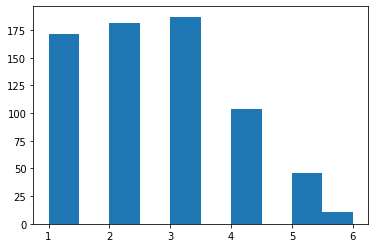

Distribution for n_rooms


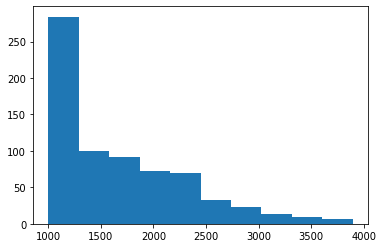

Distribution for size


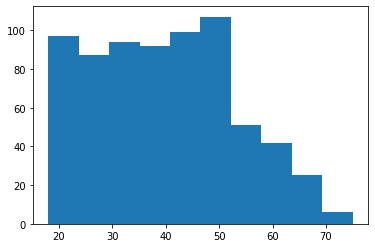

Distribution for age


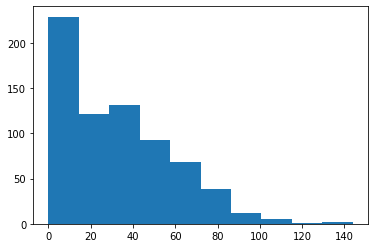

Distribution for dist


In [8]:
for name in X.columns:
    plt.hist(X[name])
    plt.show()
    print("Distribution for %s" %(name))

It looks like number of rooms, age, distance, and size are all left skewed, with size having a significant outlier of 1000-1250. That could cause some problems with out model since linear regression assumes normal distribution and no outliers. I'll attempt to normalize the data using the boxcox method for the number of rooms, size, and age, then us the minmax scaler for the distance column since it contains values of zero and the boxcox method requires all data points to be positive.   

In [9]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X["rooms_boxcox"] = df[["n_rooms"]].apply(stats.boxcox)
X["n_rooms"] = X["rooms_boxcox"][0]
X["size_boxcox"] = df[["size"]].apply(stats.boxcox)
X["size"] = X["size_boxcox"][0]
X["age_boxcox"] = df[["age"]].apply(stats.boxcox)
X["age"] = X["age_boxcox"][0]

X["dist"] = scaler.fit_transform(X[["dist"]])

In [10]:
X


,n_rooms,size,age,dist,rooms_boxcox,size_boxcox,age_boxcox
0,1.331033,1.477848,19.270042,0.583333,"[1.3310326757884194, 0.7813169043158319, 0.0, ...","[1.4778476608139222, 1.4770583570775715, 1.479...","[19.270042077761314, 12.190108305936358, 10.31..."
1,0.781317,1.477058,12.190108,0.451389,0.338863,-0.672976,0.609822
2,0.000000,1.479926,10.318732,0.000000,NaN,NaN,NaN
3,0.000000,1.472755,12.943763,0.222222,NaN,NaN,NaN
4,1.769495,1.471710,11.933006,0.284722,NaN,NaN,NaN
...,...,...,...,...,...,...,...
695,1.769495,1.471710,13.189479,0.340278,NaN,NaN,NaN
696,0.000000,1.475270,15.518659,0.534722,NaN,NaN,NaN
697,0.781317,1.471710,15.518659,0.000000,NaN,NaN,NaN
698,0.781317,1.478616,16.394949,0.277778,NaN,NaN,NaN


In [11]:
X = X.drop(["rooms_boxcox", "size_boxcox", "age_boxcox"], axis = 1)

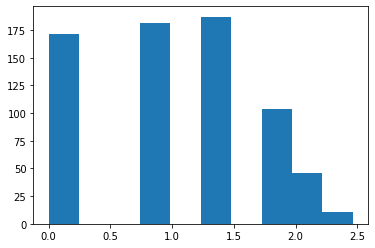

Distribution for n_rooms, and the skew is -0.06544287298066322


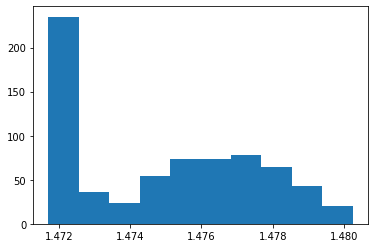

Distribution for size, and the skew is 0.11561060279626775


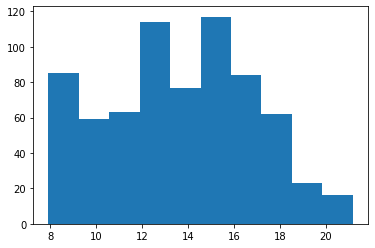

Distribution for age, and the skew is -0.06470320194781798


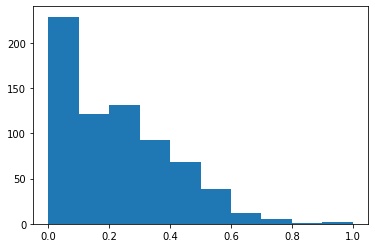

Distribution for dist, and the skew is 0.7431415984625536


In [12]:
for name in X.columns:
    plt.hist(X[name])
    plt.show()
    skew = X[name].skew()
    print("Distribution for %s, and the skew is %s" %(name, skew))

In [13]:
y = df["claims"]

In [14]:
lin_mod = LinearRegression()

In [15]:
lin_mod.fit(X,y)

LinearRegression()

In [16]:
lin_mod.intercept_

-3070.322005014926

In [17]:
lin_mod.coef_

array([ 162.91343034, 2857.59056867,  -11.69835647,   96.1440486 ])

In [18]:
pd.DataFrame(lin_mod.coef_, columns = ["weight"], index = X.columns)

,weight
n_rooms,162.913430
size,2857.590569
age,-11.698356
dist,96.144049


In [19]:
y_hat = lin_mod.predict(X)

In [20]:
mse = mean_squared_error(y_hat, y)

In [21]:
mse

103975.13084208473

In [22]:
y_hat_naive = [y.mean()] * len(y)

In [23]:
mse_naive = mean_squared_error(y_hat_naive, y)

In [24]:
mse_naive

119088.05926696716

In [25]:
model_comparison = (mse_naive - mse)/(mse_naive)

In [26]:
model_comparison

0.12690548924811032

It appears the linear regression model only saw an increase of 12.7% accuracy by using linear regression compared to just using the average value. That also considering that the data was transformed using the boxcox method and the min max scalar. The main takeaway here is that because of the outliers in the data and that the data was not naturally following a normal distribution, then linear regression is not the best trategy for a predictive model for the particular data set because linear regression requires normally distributed data and minimal outliers. 